In [1]:
import json, matplotlib, pycm, pandas as pd, seaborn as sns, numpy as np

In [2]:
def confusion_matrix_for_eval_run(file):
    eval_run = json.load(open(file, 'r'))
    data = pd.DataFrame.from_records(eval_run["data"])
    return pycm.ConfusionMatrix(data["woman"].tolist(), data["classification"].tolist(), digit=2, classes=['true', 'false'])

In [3]:
def plot_confusion_matrix(cm,normalize=False, title='Confusion matrix', annot=False, cmap="YlGnBu"):
    if normalize == True:
        df = pd.DataFrame(cm.normalized_matrix).T.fillna(0)
    else:
        df = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df, annot=annot, cmap=cmap)
    ax.set_title(title)
    ax.set(xlabel='Predict', ylabel='Actual')

In [4]:
oed_cm = confusion_matrix_for_eval_run('./data/gpt-4_oed_woman_2023-08-14T11:37:28.388789.json')
haslanger_cm = confusion_matrix_for_eval_run('./data/gpt-4_haslanger_woman_2023-08-14T11:37:28.391962.json')
homosaurus_cm = confusion_matrix_for_eval_run('./data/gpt-4_homosaurus_woman_2023-08-14T11:37:28.392927.json')

In [5]:
print(pycm.Compare({"OED": oed_cm, "Haslanger": haslanger_cm, "Homosaurus": homosaurus_cm}))

Best : Homosaurus

Rank   Name          Class-Score       Overall-Score
1      Homosaurus    0.91667           0.95238
2      OED           0.88333           0.92381
3      Haslanger     0.76667           0.78095



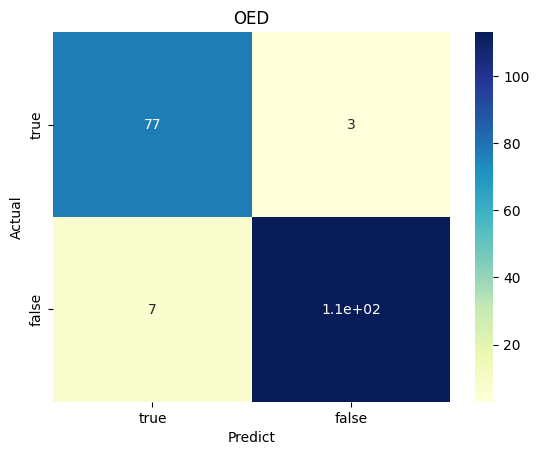

In [6]:
plot_confusion_matrix(oed_cm, title="OED", annot=True)

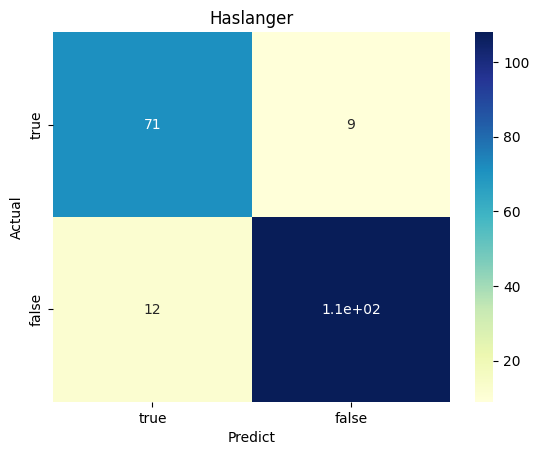

In [7]:
plot_confusion_matrix(haslanger_cm, title="Haslanger", annot=True)

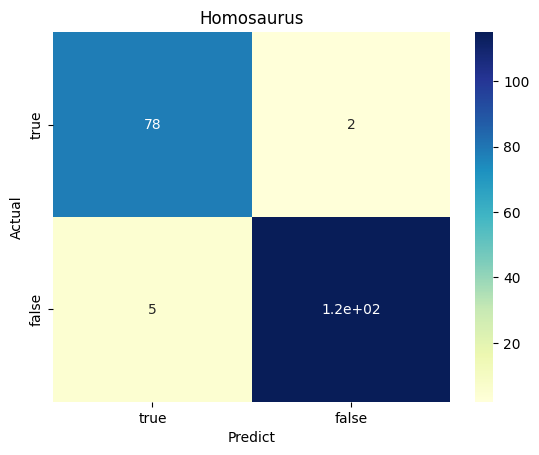

In [8]:
plot_confusion_matrix(homosaurus_cm, title="Homosaurus", annot=True)

In [9]:
haslanger_cm.CI("Kappa")

[0.0448790896210049, (0.6946456799950044, 0.8705717113093435)]

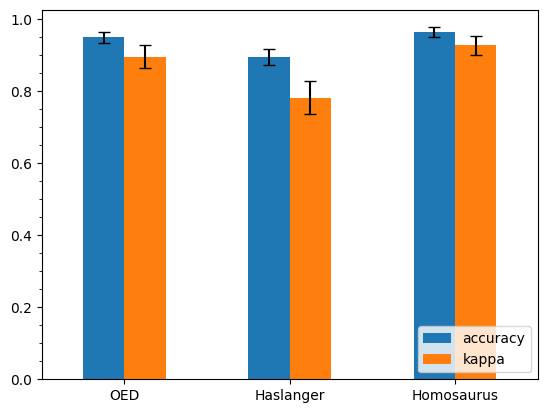

In [10]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
kappa = [ cm.Kappa for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ oed_cm, haslanger_cm, homosaurus_cm ] ]
index = [ "OED", "Haslanger", "Homosaurus"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = matplotlib.pyplot.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')